# Cloudy and Sunny

### Time to get your hands dirty! Planning a telescope observation


Let's build your first Markov Chain! 

You are a real astronomer (not a theory guy like me) and are planning an expensive observational campaign. You want to know how likely it is that tomorrow night will be clear given the weather tonight (clear or cloudy). The key piece of information here is that the weather tomorrow depends on the weather today. From past history, you know that:

$$p({\rm clear \; tomorrow} \, |\,  {\rm cloudy \; today}) = 0.5,$$

which means that

$$p({\rm cloudy \; tomorrow} \, |\, {\rm cloudy \; today}) = 0.5.$$

We also have

$$p({\rm cloudy \; tomorrow} \, |\, {\rm clear \; today}) = 0.1,$$

which means that

$$p({\rm clear \; tomorrow} \, |\, {\rm clear \; today}) = 0.9.$$


- We can start with the sky conditions today and make predictions going forward more and more into the future.
- This will look like a big decision tree. 
- After enough days, we'll reach equilibrium probabilities that have to do with the mean weather statistics (ignoring seasons) and we'll arrive at

$$p({\rm clear}) = 0.83,$$

and 

$$p({\rm cloudy}) = 0.17.$$

You get the same answer for day $N$ as day $N+1$ and it doesn't matter whether it was clear or cloudy on the day that you started. The steps that we have taken in this process are, indeed, a **MARKOV CHAIN**.

Here is an illustration of this process from an article in [towarddatascience.com](https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d).

![image.png](https://miro.medium.com/max/416/1*frksGjINf5oTjx7WL81U3w.png)

#### Tasks

- Start off on a cloud day. 
- Implement your weather forecast based on the above probabilities
- Run your simulator for N days (with $N\gtrsim 10^4$)
- Prepare a plot with the number of days on the x axis and the cumulative number of, say, sunny days over the number of days so far on the y axis. This is called a **trace-plot**, showing how our estimate of $p(\mathrm{clear})$ evolves as the chain samples.  
- Prepare a histogram of the above plot. This reveals the distribution of $p(\mathrm{clear})$.
- Use a summary statistics to determine the most likely value and an error on our estimate.

**Important:** 
- In MCMC the process must be **stationary** which basically means that the chain statistics look the same no matter which chunk you look at, e.g. first half, second half, or every other point, etc.  
- Obviously that isn't going to be the case in the early steps of the chain. In our example above, after some time the process was stationary, but not in the first few days.
- So, there is a **burn-in** phase that needs to be discarded. How one determines the number of early steps to discard as burn-in is tricky, but ***you should always start with a traceplot of your samples!***


#### Tasks

- In the above example, experiment with chopping off different numbers of initial points as burn-in.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Meteo condistions

Define the first markov chain

In [4]:
def mark_chain (meteo, stay_sunny, stay_cloudy):
    
    rand_num = np.random.uniform()
    
    if meteo == 1:
        
        if rand_num <= stay_sunny:
            return 1
        
        else:
            return 0
    
    elif meteo == 0:
        
        if rand_num <= stay_cloudy:
            return 0
        
        else:
            return 1

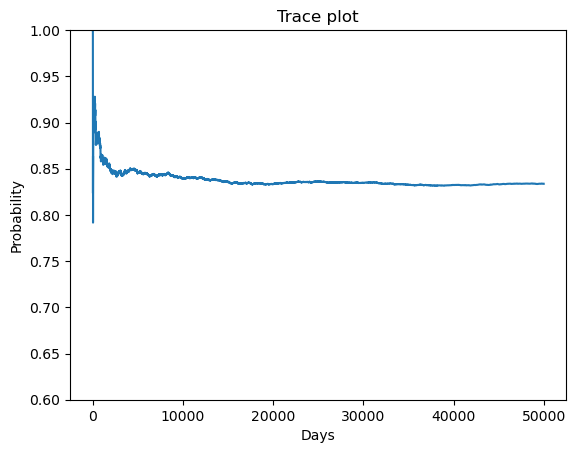

Sunny days percentage: 0.83
Cloudy days percentage: 0.17


In [6]:
#Conventions
sunny = 1
cloudy = 0

meteo = 1 # Starting 
N = 50000
meteo_days = []
sunny_prob = []

# Probabilities
stay_sunny = 0.9
stay_cloudy = 0.5

# Markov chain and cumulative probabilities
# you can make an arrray of the results and then use the cumsum function
# meteo = np.array(meteo_days)
# cumulative = np.cumsum(meteo_days)/(np.arange(meteo_days.shape[0])+1)

for i in range(N):
    
    meteo = mark_chain(meteo, stay_sunny, stay_cloudy)
    meteo_days.append(meteo)
    sunny_prob.append(np.sum(meteo_days) / (i+1))
    
    
plt.plot(sunny_prob)
plt.ylim(0.6, 1)
plt.title('Trace plot')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.show()

print('Sunny days percentage: %.02f' % (np.sum(meteo_days)/N))
print('Cloudy days percentage:', round(1 - np.sum(meteo_days)/N, 2))


# Stats:
The median seems more solid, when the histogram has a bad shape, the median capture better the core of the histogram.
If the burn-in is reduced, the median is better


In [8]:
mean = np.mean(sunny_prob)
median =  np.median(sunny_prob)
sigma = np.std(sunny_prob)
sigma_mean = sigma / (N)**0.5

print('mean: %.03f' %mean)
print('sigma: %.03f' %sigma) 
print('sigma mean: %.05f' %sigma_mean)
print('median: %.03f' %median)

q25, q50, q75 = np.percentile(sunny_prob, [25, 50, 75])
print('Quantiles: (25: %.03f' %q25, ' 50: %.03f' %q50, ' 75: %.03f' %q75 +')')
print('interquantile range = %.04f' %(q75 - q25))

mean: 0.838
sigma: 0.009
sigma mean: 0.00004
median: 0.835
Quantiles: (25: 0.833  50: 0.835  75: 0.839)
interquantile range = 0.0053


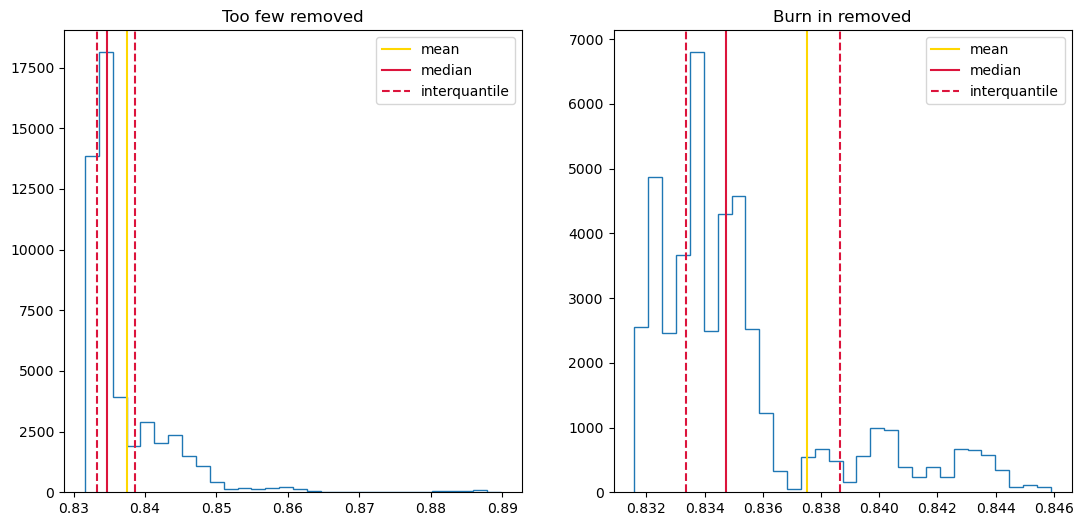

In [10]:
# 6000 burn in of the chain
# In the two plots, the values of the statistics is the SAME! (Burn in included)

fig = plt.figure(figsize = (13, 6))

ax = fig.add_subplot(121)
ax.hist(sunny_prob[500:], bins = 30, histtype = 'step')
plt.axvline(mean, c = 'gold', label = 'mean')
plt.axvline(median, c = 'crimson', label = 'median')
plt.axvline(q75, c = 'crimson', ls = '--', label = 'interquantile')
plt.axvline(q25, c = 'crimson', ls = '--')
plt.title('Too few removed')
plt.legend()

ax = fig.add_subplot(122)
ax.hist(sunny_prob[6000:], bins = 30, histtype = 'step')
plt.axvline(mean, c = 'gold', label = 'mean')
plt.axvline(median, c = 'crimson', label = 'median')
plt.axvline(q75, c = 'crimson', ls = '--', label = 'interquantile')
plt.axvline(q25, c = 'crimson', ls = '--')
plt.title('Burn in removed')
plt.legend()

plt.show()


Recomputing the stats after burn in Removing

In [13]:
print('Recap of the full ones:', '\n')
print('mean: %.03f' %mean)
print('sigma: %.03f' %sigma) 
print('sigma mean: %.05f' %sigma_mean)
print('median: %.03f' %median)

q25, q50, q75 = np.percentile(sunny_prob, [25, 50, 75])
print('Quantiles: (25: %.03f' %q25, ' 50: %.03f' %q50, ' 75: %.03f' %q75 +')')
print('interquantile range = %.04f' %(q75 - q25))

print('\n Burn in removed stats:', '\n')

burn_mean = np.mean(sunny_prob[6000:])
burn_median =  np.median(sunny_prob[6000:])
burn_sigma = np.std(sunny_prob[6000:])
burn_sigma_mean = sigma / (N)**0.5

print('mean: %.03f' %burn_mean)
print('sigma: %.03f' %burn_sigma) 
print('sigma mean: %.05f' %burn_sigma_mean)
print('median: %.03f' %burn_median)

q25, q50, q75 = np.percentile(sunny_prob[6000:], [25, 50, 75])
print('Quantiles: (25: %.03f' %q25, ' 50: %.03f' %q50, ' 75: %.03f' %q75 +')')
print('interquantile range = %.04f' %(q75 - q25))

Recap of the full ones: 

mean: 0.838
sigma: 0.009
sigma mean: 0.00004
median: 0.835
Quantiles: (25: 0.833  50: 0.835  75: 0.839)
interquantile range = 0.0053

 Burn in removed stats: 

mean: 0.835
sigma: 0.003
sigma mean: 0.00004
median: 0.834
Quantiles: (25: 0.833  50: 0.834  75: 0.836)
interquantile range = 0.0025


# Stock market example

In [15]:
def mark_chain_market (start, stay_bull, stay_bear, stay_stagn, bull_bear, bear_bull, stagn_bull):
    
    rand_num = np.random.uniform()
    
    # Bull market
    if start == 0:

        if rand_num <= bull_stagn:
            return 2
        
        elif rand_num > bull_stagn and rand_num <= (1 - stay_bull): 
            return 1
        
        else: 
            return 0
        
    # Bear market
    elif start == 1:
        
        if rand_num <= bear_stagn:
            return 2
        
        elif rand_num > bear_stagn and rand_num <= (1 - stay_bear):
            return 0
        
        else:
            return 1
        
     # stagnant market
    elif start == 2:
         
         if rand_num <= stagn_bull:
             return 0
         
         if rand_num > stagn_bull and rand_num <= (1 - stay_stagn):
             return 1
         
         else:
             return 2
         

In [17]:
start = 0

# Probabilities
stay_bull = 0.9
stay_bear = 0.8
stay_stagn = 0.5
bull_bear = 0.075
bull_stagn = 0.025
bear_stagn = 0.05
bear_bull = 0.15
stagn_bear = 0.25
stagn_bull = 0.25

market_trend = []
bull_trace = []
bull_trace_counter = []
bear_trace = []
bear_trace_counter = []
stagn_trace = []
stagn_trace_counter = []
            
for i in range(N):
    
    market = mark_chain_market(start, stay_bull, stay_bear, stay_stagn, bull_bear, bear_bull, stagn_bull)
    market_trend.append(market)
    
    if market_trend[i] == 0:
        
        bull_trace_counter.append(1)
        bull_trace.append(np.sum(bull_trace_counter) / (i+1))
        
    elif market_trend[i] == 1:
        
        bear_trace_counter.append(1)
        bear_trace.append(np.sum(bear_trace_counter) / (i+1))
        
    elif market_trend[i] == 2:
        
        stagn_trace_counter.append(1)
        stagn_trace.append(np.sum(stagn_trace_counter) / (i+1))

    start = market_trend[i]
    
market_trend = np.array(market_trend)


## Stats and plots

In [32]:
cond_bull = (market_trend == 0)
cond_bear = (market_trend == 1)
cond_stagn = (market_trend == 2)

bull = market_trend[cond_bull]
bull_prob = len(bull) / len(market_trend)
bear = market_trend[cond_bear]
bear_prob = len(bear) / len(market_trend)
stagn = market_trend[cond_stagn]
stagn_prob = len(stagn) / len(market_trend)

print('Bull Probability: ', bull_prob)
print('Bear Probability: ', bear_prob)
print('Stagnant Probability: ', stagn_prob) 

mean_bull = np.mean(bull_trace)
median_bull =  np.median(bull_trace)
mean_bear = np.mean(bear_trace)
median_bear =  np.median(bear_trace)
mean_stagn = np.mean(stagn_trace)
median_stagn =  np.median(stagn_trace)

sigma_bull = np.std(bull_trace)
sigma_mean_bull = sigma_bull / (N)**0.5
sigma_bear = np.std(bear_trace)
sigma_mean_bear = sigma_bear / (N)**0.5
sigma_stagn = np.std(stagn_trace)
sigma_mean_stagn = sigma_stagn / (N)**0.5

print('\n','STATS WITH BURNIN:')

print('Bull:', '\n', 
      'mean : %.03f' %mean_bull, '\n',
      'median : %.03f' %median_bull, '\n',
      'sigma : %.03f' %sigma_bull, '\n',
      'sigma mean : %.05f' %sigma_mean_bull )

print('Bear:', '\n', 
      'mean : %.03f' %mean_bear, '\n',
      'median : %.03f' %median_bear, '\n',
      'sigma : %.03f' %sigma_bear, '\n',
      'sigma mean : %.05f' %sigma_mean_bear )

print('Stagnant:', '\n', 
      'mean : %.03f' %mean_stagn, '\n',
      'median : %.03f' %median_stagn, '\n',
      'sigma : %.03f' %sigma_stagn, '\n',
      'sigma mean : %.05f' %sigma_mean_stagn )



bull_q25, bull_q50, bull_q75 = np.percentile(bull_trace, [25, 50, 75])
print('Bull:')
print('Quantiles: (25: %.03f' %bull_q25, ' 50: %.03f' %bull_q50, ' 75: %.03f' %bull_q75 +')')
print('interquantile range = %.04f' %(bull_q75 - bull_q25))

bear_q25, bear_q50, bear_q75 = np.percentile(bear_trace, [25, 50, 75])
print('Bear:')
print('Quantiles: (25: %.03f' %bear_q25, ' 50: %.03f' %bear_q50, ' 75: %.03f' %bear_q75 +')')
print('interquantile range = %.04f' %(bear_q75 - bear_q25))

stagn_q25, stagn_q50, stagn_q75 = np.percentile(stagn_trace, [25, 50, 75])
print('Stagnant:')
print('Quantiles: (25: %.03f' %stagn_q25, ' 50: %.03f' %stagn_q50, ' 75: %.03f' %stagn_q75 +')')
print('interquantile range = %.04f' %(stagn_q75 - stagn_q25))

mean_bull = np.mean(bull_trace[2000:])
median_bull =  np.median(bull_trace[2000:])
mean_bear = np.mean(bear_trace[2000:])
median_bear =  np.median(bear_trace[2000:])
mean_stagn = np.mean(stagn_trace[500:])
median_stagn =  np.median(stagn_trace[500:])

sigma_bull = np.std(bull_trace[2000:])
sigma_mean_bull = sigma_bull / (N)**0.5
sigma_bear = np.std(bear_trace[2000:])
sigma_mean_bear = sigma_bear / (N)**0.5
sigma_stagn = np.std(stagn_trace[500:])
sigma_mean_stagn = sigma_stagn / (N)**0.5

print('\n', 'STATS WITHOUT BURNIN:')

print('Bull:', '\n', 
      'mean : %.03f' %mean_bull, '\n',
      'median : %.03f' %median_bull, '\n',
      'sigma : %.03f' %sigma_bull, '\n',
      'sigma mean : %.05f' %sigma_mean_bull )

print('Bear:', '\n', 
      'mean : %.03f' %mean_bear, '\n',
      'median : %.03f' %median_bear, '\n',
      'sigma : %.03f' %sigma_bear, '\n',
      'sigma mean : %.05f' %sigma_mean_bear )

print('Stagnant:', '\n', 
      'mean : %.03f' %mean_stagn, '\n',
      'median : %.03f' %median_stagn, '\n',
      'sigma : %.03f' %sigma_stagn, '\n',
      'sigma mean : %.05f' %sigma_mean_stagn )

bull_q25, bull_q50, bull_q75 = np.percentile(bull_trace[2000:], [25, 50, 75])
print('Bull:')
print('Quantiles: (25: %.03f' %bull_q25, ' 50: %.03f' %bull_q50, ' 75: %.03f' %bull_q75 +')')
print('interquantile range = %.04f' %(bull_q75 - bull_q25))

bear_q25, bear_q50, bear_q75 = np.percentile(bear_trace[2000:], [25, 50, 75])
print('Bear:')
print('Quantiles: (25: %.03f' %bear_q25, ' 50: %.03f' %bear_q50, ' 75: %.03f' %bear_q75 +')')
print('interquantile range = %.04f' %(bear_q75 - bear_q25))

stagn_q25, stagn_q50, stagn_q75 = np.percentile(stagn_trace[500:], [25, 50, 75])
print('Stagnant:')
print('Quantiles: (25: %.03f' %stagn_q25, ' 50: %.03f' %stagn_q50, ' 75: %.03f' %stagn_q75 +')')
print('interquantile range = %.04f' %(stagn_q75 - stagn_q25))


Bull Probability:  0.61924
Bear Probability:  0.31996
Stagnant Probability:  0.0608

 STATS WITH BURNIN:
Bull: 
 mean : 0.623 
 median : 0.622 
 sigma : 0.016 
 sigma mean : 0.00007
Bear: 
 mean : 0.317 
 median : 0.318 
 sigma : 0.009 
 sigma mean : 0.00004
Stagnant: 
 mean : 0.060 
 median : 0.061 
 sigma : 0.003 
 sigma mean : 0.00001
Bull:
Quantiles: (25: 0.619  50: 0.622  75: 0.625)
interquantile range = 0.0055
Bear:
Quantiles: (25: 0.315  50: 0.318  75: 0.319)
interquantile range = 0.0048
Stagnant:
Quantiles: (25: 0.061  50: 0.061  75: 0.061)
interquantile range = 0.0009

 STATS WITHOUT BURNIN:
Bull: 
 mean : 0.622 
 median : 0.621 
 sigma : 0.003 
 sigma mean : 0.00002
Bear: 
 mean : 0.317 
 median : 0.318 
 sigma : 0.003 
 sigma mean : 0.00001
Stagnant: 
 mean : 0.061 
 median : 0.061 
 sigma : 0.001 
 sigma mean : 0.00000
Bull:
Quantiles: (25: 0.619  50: 0.621  75: 0.624)
interquantile range = 0.0049
Bear:
Quantiles: (25: 0.315  50: 0.318  75: 0.319)
interquantile range = 0.00

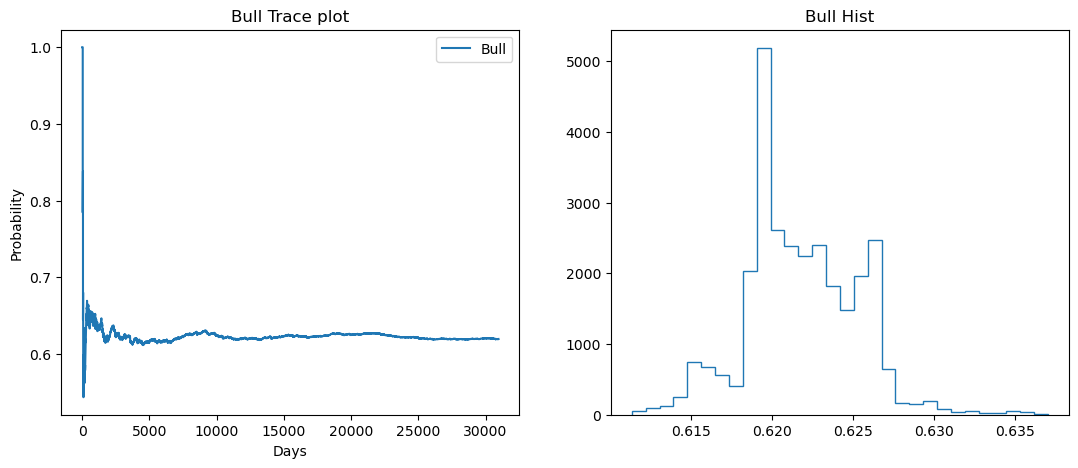

In [34]:
fig = plt.figure(figsize = (13, 5))

ax = fig.add_subplot(121)
ax.plot(bull_trace, label = 'Bull')
plt.title('Bull Trace plot')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.legend()

ax = fig.add_subplot(122)
ax.hist(bull_trace[2000:], bins = 30, histtype = 'step')
plt.title('Bull Hist')
plt.show()

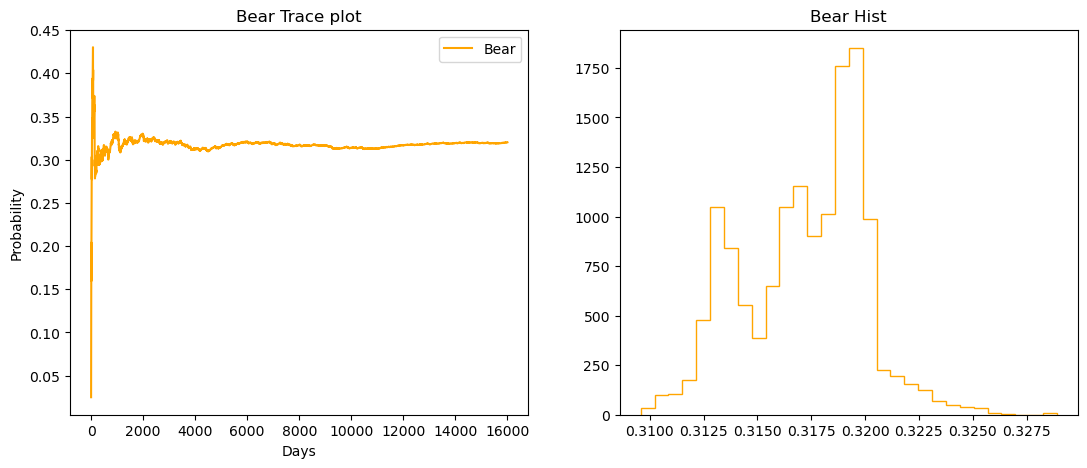

In [36]:
fig = plt.figure(figsize = (13, 5))

ax = fig.add_subplot(121)
ax.plot(bear_trace, label = 'Bear', color = 'Orange')
plt.title('Bear Trace plot')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.legend()

ax = fig.add_subplot(122)
ax.hist(bear_trace[2000:], bins = 30, histtype = 'step', color = 'Orange')
plt.title('Bear Hist')
plt.show()

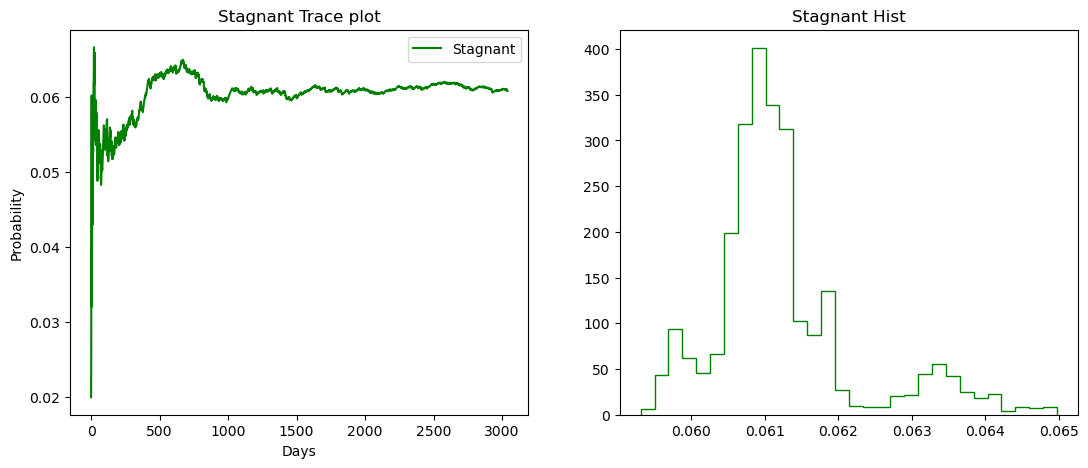

In [38]:
fig = plt.figure(figsize = (13, 5))

ax = fig.add_subplot(121)
ax.plot(stagn_trace, label = 'Stagnant', color = 'green')
plt.title('Stagnant Trace plot')
plt.xlabel('Days')
plt.ylabel('Probability')
plt.legend()

ax = fig.add_subplot(122)
ax.hist(stagn_trace[500:], bins = 30, histtype = 'step', color = 'green')
plt.title('Stagnant Hist')
plt.show()